In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import exp, log
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
import sys
sys.path.append('..')
%matplotlib inline

## Back from the theory: the BP-Algorithm
- first, something to play with: https://playground.tensorflow.org/

## BP on Loss-Function
 - usually, the crosse-entropy error-function is used in a multi-classification problem
 - adapted: $H(p,q) = - \sum_x p(x) \mathrm{log}  q(x) + (1 - p(x)) \mathrm{log}  (1 - q(x)) $

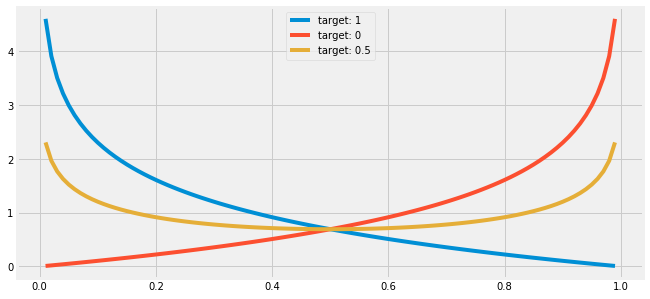

In [2]:
def cross_entropy(x, y):
    return (-1)*np.sum(x * np.log(y) + (1-x) * np.log((1-y)))

data = np.arange(0.01, 1, 0.01)
res_1 = [cross_entropy(np.array([1]), xi) for xi in data]
res_2 = [cross_entropy(np.array([0.5]), xi) for xi in data]
res_3 = [cross_entropy(np.array([0]), xi) for xi in data]
plt.figure(figsize=(10,5))
fig = plt.plot(data, res_1, label="target: 1")
fig = plt.plot(data, res_3, label="target: 0")
fig = plt.plot(data, res_2, label="target: 0.5")
plt.legend()
plt.show()

 - why? focusing on the stuff you've got wrong proved to be sucessfull (overfitting etc.)
 - still accetable learning rate if near optimum
 in NNs usually: $H(target, output)$

#### derivation of cross-entropy error function
### $\frac{\partial H}{\partial o_i} = \frac{-t_i}{o_i} + \frac{1-t_i}{1-o_i} = \frac{o_i-t_i}{o_i(1-o_i)}$

In [3]:
def cross_entropy_deriv(x, y):
    return (x - y)/(x)(1-x)

## BP through Activation Functions
sigmoid is defined as:
#### $f(x)=\frac{1}{1+e^{-x}}$
derivation:
#### $\begin{align}
\frac{d f(x)}{d x} & = [\frac{1}{1+e^{-x}}]' \\
 & = [\frac{e^x}{1+e^{x}}]' \\
 & = \frac{e^x}{(1+e^{x})^2}\\
 & = f(x)(1-f(x))
\end{align}$

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoidDeriv(x):
    sigm = sigmoid(x)
    return sigm*(1-sigm)

## BP on weights and biases
#### $n=n(x)=w^T \cdot x + b$
#### $\frac{d n}{d w_i} = w_i$

## Putting it together: Breast Cancer Wisconsin (Diagnostic) Dataset
#### definitions: $y = f_{sigmoid}(n)$, $n = w^T \cdot x + b$ and trained with $H_{crossentropy}(target, y)$
#### $\begin{align}
\frac{\partial H}{\partial w_i} & = \frac{\partial H}{\partial y}\frac{\partial y}{\partial w_i} \\
 & = \frac{\partial H}{\partial y}\frac{\partial y}{\partial n}\frac{\partial n}{\partial w_i} \\
 & = \frac{y-t}{y(1-y)}\frac{\partial y}{\partial n}\frac{\partial n}{\partial w_i}\\
 & = \frac{y-t}{y(1-y)}(y \cdot (1-y))\frac{\partial n}{\partial w_i}\\
 & = (y-t)\frac{\partial n}{\partial w_i} \\
 & = (y-t)w_i
\end{align}$
bias is similiar

In [5]:
from src.backward import *
backwardB = BackwardWeightsBCW()

In [6]:
def forewardPass(data):
    x = sigmoid(np.dot(data, backwardB.getWeights().transpose()) + backwardB.getBias())
    return x

In [7]:
def backwardPass(train_x, train_y):
    res = forewardPass(train_x)
    temp = res - train_y
    backwardB.setWeights(backwardB.getWeights() - (0.02) * temp * backwardB.getWeights())
    backwardB.setBias(np.sum(temp))

In [8]:
train = backwardB.getTrain(backwardPass, forewardPass)

In [9]:
train.train(200,10)

train 6.907915198468176
test 7.993605777301132e-16
train 20.72374559540453
test 20.72374559540453
train 6.680927492151125
test 6.756162744748282
train 3.7254184543852618
test 5.304400097427177
train 3.2800189794796344
test 3.109536626865598
train 2.560563807936232
test 2.514661679268227
train 0.05812736418618904
test 0.02339848292131911
train 2.092301361027804
test 1.2479770978858353
train 0.16639764355499348
test 0.7183674194421668
train 0.46815632164392873
test 0.5554998637490812
train 0.4848968500107344
test 0.4961633912764074
train 0.524438790197108
test 0.6181461599696001
train 0.5236496092618192
test 0.46696846462781105
train 0.5555951914395248
test 0.6479741908042085
train 0.6338973617297687
test 0.6109807770538911
train 0.8451191384726036
test 0.49793693827329893
train 0.566831906445843
test 0.5923542310028386
train 0.5521188256347188
test 0.9123918437663544
train 0.6057566024475551
test 0.5668561124650471


In [18]:
import numpy.random as rand
np.random.choice(train.get_test().shape[0], 1)

array([84])

## Putting it together: MNIST
![alt text](/assets/mlp_model.png)

"from last to the first layer" 

pretty similiar, don't get confused by all the indices!
#### definitions: $y_{iz} = f_{sigmoid}(n_{iz})$, $n_{iz} = w_{iz}^T \cdot x_z + b_{iz}$ and trained with $H_{crossentropy}(\vec{target}, \vec{y_2})$, where $iz$ is the $i$-th result in layer $z$ (output layer has the highest number)
#### $\begin{align}
\frac{\partial H}{\partial w_{piz}} & = \frac{\partial H}{\partial y_{iz}}\frac{\partial y_{iz}}{\partial w_{piz}} \\
 & = \frac{\partial H}{\partial y_{iz}}\frac{\partial y_{iz}}{\partial n_{iz}}\frac{\partial n_{iz}}{\partial w_{piz}} \\
 & = \frac{\partial H}{\partial y_{iz}}\frac{\partial y_{iz}}{\partial n_{iz}}x_{piz} \\
 & = \frac{\partial H}{\partial y_{iz}}y_{iz}(1 - y_{iz})x_{piz}\\
 & =(\sum_{j_{(z +1)} = 0}^{l_{(z+1)}}\frac{\partial H}{\partial y_{j_{(z+1)}(z + 1)}}\frac{\partial y_{j_{(z+1)}(z + 1)}}{\partial y_{iz}})y_{iz}(1 - y_{iz})x_{piz} \\
 & =(\sum_{j_{(z +1)} = 0}^{l_{(z+1)}}\frac{\partial H}{\partial y_{j_{(z+1)}(z + 1)}}\frac{\partial y_{j_{(z+1)}(z + 1)}}{\partial n_{j_{(z+1)}(z + 1)}}\frac{\partial n_{j_{(z+1)}(z + 1)}}{\partial y_{iz}})y_{iz}(1 - y_{iz})x_{piz} \\
 & =(\sum_{j_{(z +1)} = 0}^{l_{(z+1)}}\frac{\partial H}{\partial y_{j_{(z+1)}(z + 1)}}\frac{\partial y_{j_{(z+1)}(z + 1)}}{\partial n_{j_{(z+1)}(z + 1)}}w_{ij_{(z+1)}(z + 1)})y_{iz}(1 - y_{iz})x_{piz} \\
  & =(\sum_{j_{(z +1)} = 0}^{l_{(z+1)}}\text{already computed!}w_{ij_{(z+1)}(z + 1)})y_{iz}(1 - y_{iz})x_{piz} \\
  & =(\sum_{j_{(z +1)} = 0}^{l_{(z+1)}}RESULT_{j_{(z+1)}(z+1)}w_{ij_{(z+1)}(z + 1)})y_{iz}(1 - y_{iz})x_{piz}
\end{align}$
bias is similiar

In [ ]:
from src.backward import *
backwardB = BackwardWeightsBCW()

In [10]:
def forewardMNIST(data):
    hidden = sigmoid(np.dot(data, backwardB.getWeights(0)) + backwardB.getBias(0))
    out = softmax(np.dot(hidden, backwardB.getWeights(1)) + backwardB.getBias(1))
    return out

def getClass(data):
    proba = forewardMNIST(data)
    return np.argmax(proba, axis=1)

further resources:
 - https://playground.tensorflow.org/
 - https://fosterelli.co/executing-gradient-descent-on-the-earth
 - https://page.mi.fu-berlin.de/rojas/neural/chapter/K7.pdf
 - https://www.ics.uci.edu/~pjsadows/notes.pdf